## Importing libraries/data

### Importing Libraries

In [1]:
# For general use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For our classifiers
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network

# For saving classifier to file
import pickle

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits  

### Importing CSV data

In [4]:
dfs = []
for cls in ['+', ')', '(', ',', '-','0','1','2','3','4','5','6','7','8','9']:
    print(f"Loading {cls}.CSV...")
    a = pd.read_csv("CSV/"+cls+".csv", index_col=0)
    a['class'] = cls
    dfs.append(a)

print("Concatenating Data...")
df = pd.concat(dfs,ignore_index=True, sort=False)
print("Done")

Loading +.CSV...
Loading ).CSV...
Loading (.CSV...
Loading ,.CSV...
Loading -.CSV...
Loading 0.CSV...
Loading 1.CSV...
Loading 2.CSV...
Loading 3.CSV...
Loading 4.CSV...
Loading 5.CSV...
Loading 6.CSV...
Loading 7.CSV...
Loading 8.CSV...
Loading 9.CSV...
Concatenating Data...
Done


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,+
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,+
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,+
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,+
4,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
149660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
149661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
149662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### Test/Train split

In [7]:
features = [feature for feature in df]
features.remove("class")

all_X = np.array(df[features])
all_y = np.array(df["class"])

train_X = np.array(df[df.index%2 == 0][features])
train_y = df[df.index%2 == 0]["class"]

test_X = np.array(df[df.index%2 == 1][features])
test_y = df[df.index%2 == 1]["class"]

## Testing classifiers
I conducted some "accuracy vs parameter" tests and found these to the be the optimal `n_neighbors` and `max_depth` values. In the future I will put those tests here

In [16]:
# Getting a subset of the data for faster runtime
num = 100
train_X_KN = np.array(df[df.index%num == 0][features])
train_y_KN = df[df.index%num == 0]["class"]

test_X_KN = np.array(df[df.index%num == 1][features])
test_y_KN = df[df.index%num == 1]["class"]

# Kneighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
print("Fitting...")
clf.fit(train_X_KN, train_y_KN)
print("Scoring...")
clf.score(test_X_KN, test_y_KN)

Fitting...
Scoring...


0.7474949899799599

In [6]:
# Decision Tree
clf = tree.DecisionTreeClassifier(random_state=10)
print("Fitting...")
clf.fit(train_X, train_y)
print("Scoring...")
clf.score(test_X, test_y)

Fitting...
Scoring...


0.9230810348514005

In [7]:
# Gaussian Naive Bayes
clf = naive_bayes.GaussianNB()
print("Fitting...")
clf.fit(train_X, train_y)
print("Scoring...")
clf.score(test_X, test_y)

Fitting...
Scoring...


0.7763657258926663

### Finding most accurate hidden_layer_sizes value

In [13]:
# Getting a subset of the data for faster runtime (again)
data_portion = 2000
train_X_NN = np.array(df[df.index%data_portion == 0][features])
train_y_NN = df[df.index%data_portion == 0]["class"]

test_X2_NN = np.array(df[df.index%data_portion == 1][features])
test_y2_NN = df[df.index%data_portion == 1]["class"]

# Recording scores
scoresNN = []
for hid in range(1, 20):
    print(f"fitting and scoring hidden_layer_sizes={hid}...")
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(hid),max_iter=2000, random_state=42)
    clf.fit(train_X2, train_y2)
    scoresNN.append(clf.score(test_X2, test_y2))

fitting and scoring hidden_layer_sizes=1...
fitting and scoring hidden_layer_sizes=2...
fitting and scoring hidden_layer_sizes=3...
fitting and scoring hidden_layer_sizes=4...
fitting and scoring hidden_layer_sizes=5...
fitting and scoring hidden_layer_sizes=6...
fitting and scoring hidden_layer_sizes=7...
fitting and scoring hidden_layer_sizes=8...
fitting and scoring hidden_layer_sizes=9...
fitting and scoring hidden_layer_sizes=10...
fitting and scoring hidden_layer_sizes=11...
fitting and scoring hidden_layer_sizes=12...
fitting and scoring hidden_layer_sizes=13...
fitting and scoring hidden_layer_sizes=14...
fitting and scoring hidden_layer_sizes=15...
fitting and scoring hidden_layer_sizes=16...
fitting and scoring hidden_layer_sizes=17...
fitting and scoring hidden_layer_sizes=18...
fitting and scoring hidden_layer_sizes=19...


In [9]:
for i, score in zip(range(len(scoresNN)), scoresNN):
    print("hidden_layer_sizes =", i+1, '  ::  ', score)

hidden_layer_sizes = 1   ::   0.2866666666666667
hidden_layer_sizes = 2   ::   0.22
hidden_layer_sizes = 3   ::   0.2866666666666667
hidden_layer_sizes = 4   ::   0.3433333333333333
hidden_layer_sizes = 5   ::   0.33666666666666667
hidden_layer_sizes = 6   ::   0.3333333333333333
hidden_layer_sizes = 7   ::   0.2733333333333333
hidden_layer_sizes = 8   ::   0.39666666666666667
hidden_layer_sizes = 9   ::   0.42333333333333334
hidden_layer_sizes = 10   ::   0.35333333333333333
hidden_layer_sizes = 11   ::   0.37666666666666665
hidden_layer_sizes = 12   ::   0.33
hidden_layer_sizes = 13   ::   0.41
hidden_layer_sizes = 14   ::   0.41
hidden_layer_sizes = 15   ::   0.38
hidden_layer_sizes = 16   ::   0.4866666666666667
hidden_layer_sizes = 17   ::   0.42333333333333334
hidden_layer_sizes = 18   ::   0.5
hidden_layer_sizes = 19   ::   0.4166666666666667


Clearly `hidden_layer_sizes=16` is the most accurate value.

Using this value, I will conduct accuracy testing with all of the data

In [10]:
# Getting a skewed test/train split so that I will train on the majority 
#  of the data, but still have a few data to test on
num = 19
train_X3 = np.array(df[df.index%num != 0][features])
train_y3 = df[df.index%num != 0]["class"]

test_X3 = np.array(df[df.index%num == 0][features])
test_y3 = df[df.index%num == 0]["class"]

clf = neural_network.MLPClassifier(hidden_layer_sizes=(16),max_iter=8000, random_state=42)
print("fitting...")
clf.fit(train_X3, train_y3)
print("scoring...")
clf.score(test_X3, test_y3)

fitting...
scoring...


0.9456714902259457

In [11]:
with open('clf.pk', 'wb') as fout:
    pickle.dump(clf, fout)

In [8]:
clf2 = 10
with open('clf.pk', 'rb') as fin:
    clf2 = pickle.load(fin)
clf2.score(all_X, all_y)

0.9586473701090442

In [9]:
eval("(7*7)-40")

9

## Predicting things from the server  

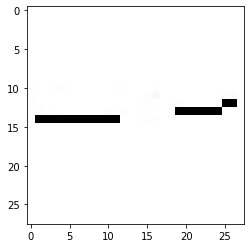

In [17]:
plt.imshow(test_X[30000].reshape(28,28), cmap=plt.cm.binary)

In [20]:
test_X[70000].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         76,  77, 155, 208, 180,  22,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  